In [ ]:
# ! pip install numpy pillow svgwrite matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 1.2 MB/s eta 0:00:07
   ---- ----------------------------------- 0.8/7.8 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/7.8 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/7.8 MB 1.3 MB/s eta 0:00:06
   -------- ------------------------------- 1.6/7.8 MB 1.3 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/7.8 MB 1.2 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/7.8 MB 1.3 MB/s eta 0:00:05
   ------------ --------------------------- 2.4/7.8 MB 1.3 MB/s eta 0:00:05
   ------------- -------------------------- 2.6/7.8 MB 1.3 MB/s eta 0:00:05
   -------------- ------------------------- 2.9/7.8 MB 1.3 MB/s eta 0:00:04
   ---------------- ----------------------- 3.1/7.8 MB 1.3 MB/s eta 0:00:04
   ----------------- -----

# CSV output handler

In [ ]:
PERF_FILE = 'D:\Desktop\csbf\icisn-result.csv'
CONF_FILE = 'D:\Desktop\csbf\icisn-configuration.csv'
import pandas as pd

perf = pd.read_csv(PERF_FILE, delimiter='/')
conf = pd.read_csv(CONF_FILE, delimiter='/')

In [6]:
perf

,TestCase,AddOrRemoveTime,KeySet,NonkeySet,F1,F2,F3,F4,F5,TestSize,Accuracy,TestTime
0,CheckSetS,0.451527,"1,2","3,4",0,0,422,377,0,800000,0.999001,0.431413
1,RemoveSetR,0.265246,2,"1,3,4",4,0,6,3,0,800000,0.999984,0.346198
2,InsetBackTest,0.440103,"1,2,3",4,0,0,0,3549,0,800000,0.995564,0.478625


In [ ]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('monitor_thesis').getOrCreate()
# perf = spark.read.csv(PERF_FILE, header=True, sep='/')
# conf = spark.read.csv(CONF_FILE, header=True, sep='/')

In [ ]:
conf

,FilterID,FilterSize,Capacity,NumHashFunctions,FalsePositiveRate,NumItemsAdded,BucketSize
0,StdBF,5173957,400000,8,0.002,400000,1
1,CBF,5173957,400000,8,0.002,400000,4
2,DelBF,5225696,400000,8,0.002,400000,1
3,OHBF,5173957,400000,8,0.002,400000,1
4,ScalableSBF,7946712,600000,8,0.002,400000,1


In [ ]:
perf_ = perf.groupby(['FilterID','TestCase']).mean(numeric_only=True).reset_index()
perf_

,FilterID,TestCase,AddOrRemoveTime,F1,F2,F3,F4,F5,TestSize,Accuracy,TestTime
0,CBF,Std Test 2,0.240793,0.0,0.0,399.4,407.2,421.0,1000000.0,0.998772,1.397870
1,DelBF,Std Test 2,0.493945,0.0,0.0,399.4,407.2,421.0,1000000.0,0.998772,1.407683
2,OHBF,Std Test 2,0.327897,0.0,0.0,410.2,420.0,442.2,1000000.0,0.998728,1.106051
3,ScalableSBF,Std Test 2,0.392145,0.0,0.0,423.4,425.6,420.2,1000000.0,0.998731,0.855107
4,StdBF,Std Test 2,0.430671,0.0,0.0,399.4,407.2,421.0,1000000.0,0.998772,1.348100


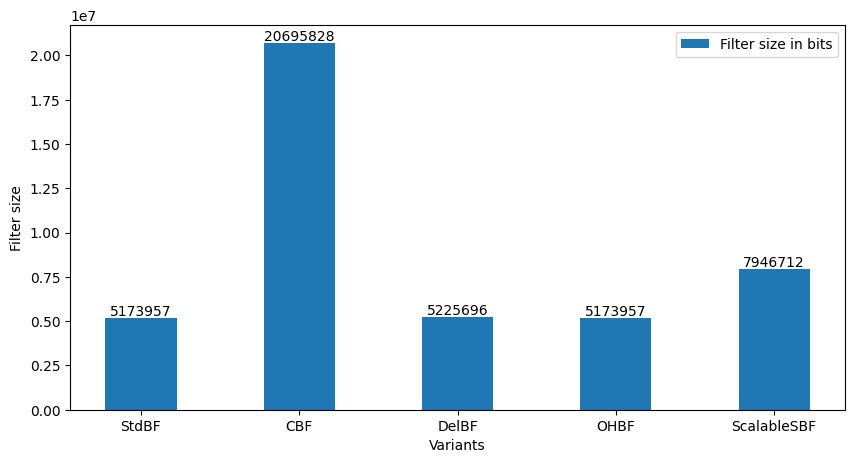

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = conf['FilterID']
values1 = conf['FilterSize'] * conf['BucketSize']

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))
width = 0.45

plt.figure(figsize=(10, 5))

# Create the first set of bars
plt.bar(categories, values1, width, label='Filter size in bits')

for i, v in enumerate(values1):
    plt.text(i, v+150000, str(int(v)), ha='center')

# Add labels, title, and legend
plt.xlabel('Variants')
plt.ylabel('Filter size')
# plt.title('Filters\' sizes in bit')
plt.xticks(x, categories)
plt.legend()

# Display the chart
plt.show()

# ? Library to turn plot to Tex (conflicting with matplotlib)
# import tikzplotlib
# tikzplotlib.save('tex/samples.tex')

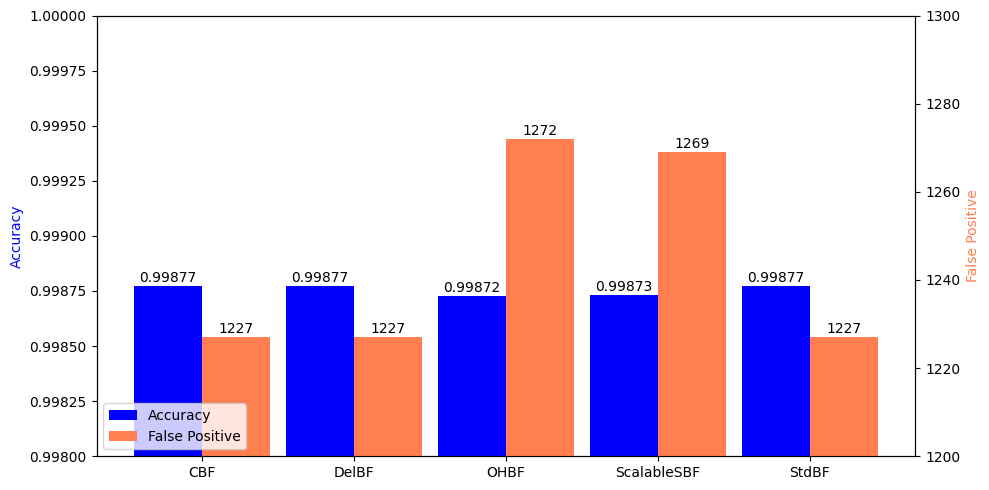

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = perf_['FilterID']
values1 = perf_['Accuracy']
values2 = (perf_['F3'] + perf_['F4'] + perf_['F5']).astype(int).tolist()

x = np.arange(len(categories))  # the label locations
width = 0.45  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 5))  # Adjust figure size for better readability

# Plot the first set of bars (Sales)
rects1 = ax1.bar(x - width/2, values1, width, label='Accuracy', color='blue')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of bars (Rating)
rects2 = ax2.bar(x + width/2, values2, width, label='False Positive', color='coral')
ax2.set_ylabel('False Positive', color='coral')
ax2.tick_params(axis='y')

# Set x-axis labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
# plt.title('Double Bar Chart with Two Different Y-Axes')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
handles, labels = lines1 + lines2, labels1 + labels2
# Legend in lower left, outside the plot area
legend = ax2.legend(handles, labels, loc="lower left")
ax1.set_ylim(bottom=0.998, top=1)
ax2.set_ylim(bottom=1200,top=1300)

# Add value labels on top of bars (optional)
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[:7],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

plt.tight_layout() #adjust layout to prevent labels from overlapping
plt.show()

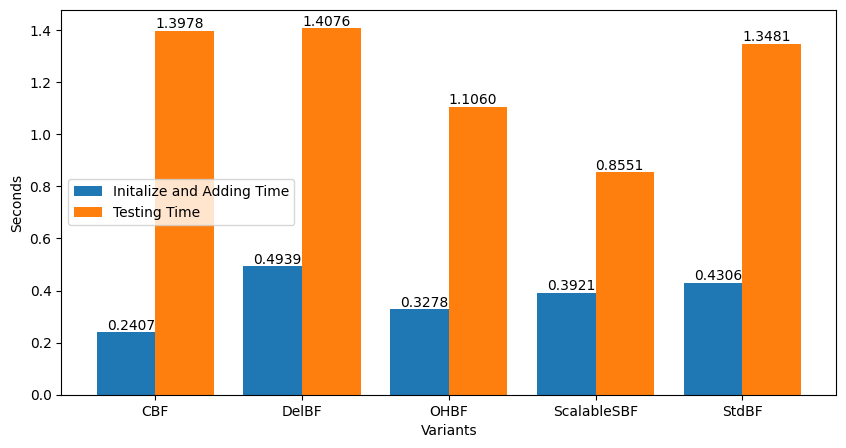

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = perf_['FilterID']
values1 = perf_['AddOrRemoveTime']
values2 = perf_['TestTime']

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))
width = 0.40

plt.figure(figsize=(10, 5))

# Create the first set of bars
plt.bar(x - width/2, values1, width, label='Initalize and Adding Time')

# Create the second set of bars
plt.bar(x + width/2, values2, width, label='Testing Time')

for i, v in enumerate(values1):
    plt.text(i, v+0.01, str(v)[:6], ha='right')
    
for i, v in enumerate(values2):
    plt.text(i, v+0.01, str(v)[:6], ha='left')

# Add labels, title, and legend
plt.xlabel('Variants')
plt.ylabel('Seconds')
# plt.title('Operation Time Consumptions')
plt.xticks(x, categories)
plt.legend()

# Display the chart
plt.show()

# ? Library to turn plot to Tex (conflicting with matplotlib)
# import tikzplotlib
# tikzplotlib.save('tex/samples.tex')

In [ ]:
table_df = pd.merge(conf, perf_, on='FilterID', how='inner')
table_df['FalsePositive'] = table_df['F1'] + table_df['F2'] + table_df['F3'] + table_df['F4'] + table_df['F5']
table_df_ = table_df.drop(columns=['F1','F2','F3','F4','F5','TestCase'])
# table_df.drop('F1')
# table_df.drop('F2')
# table_df.drop('F3')
# table_df.drop('F4')
# table_df.drop('F5')
table_df_.head()

,FilterID,FilterSize,Capacity,NumHashFunctions,FalsePositiveRate,NumItemsAdded,BucketSize,AddOrRemoveTime,TestSize,Accuracy,TestTime,FalsePositive
0,StdBF,5173957,400000,8,0.002,400000,1,0.430671,1000000.0,0.998772,1.348100,1227.6
1,CBF,5173957,400000,8,0.002,400000,4,0.240793,1000000.0,0.998772,1.397870,1227.6
2,DelBF,5225696,400000,8,0.002,400000,1,0.493945,1000000.0,0.998772,1.407683,1227.6
3,OHBF,5173957,400000,8,0.002,400000,1,0.327897,1000000.0,0.998728,1.106051,1272.4
4,ScalableSBF,7946712,600000,8,0.002,400000,1,0.392145,1000000.0,0.998731,0.855107,1269.2
